# TP BE Météo

## Chargement des données

Lessgo

In [1]:
library(sf)
library(ggplot2)
library("rnaturalearth")
library("rnaturalearthdata")
library(dplyr)
library(glue)

Linking to GEOS 3.12.1, GDAL 3.8.4, PROJ 9.4.0; sf_use_s2() is TRUE


Attaching package: ‘rnaturalearthdata’


The following object is masked from ‘package:rnaturalearth’:

    countries110



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# 31s à s'exécuter sur Stuart
data_full_dir = "../data/donnees-synop-essentielles-omm.csv"
# 9s à s'exécuter sur stuart
data_ext10_dir = "../data/donnees_extracted_metro_10.csv"

full_data <- read.csv(data_ext10_dir, 
            sep=",", 
            na.string=c("","null","NaN"),
            header=TRUE, 
            stringsAsFactors=TRUE) # SI IL Y A DES PROBLÈMES BIZARRES PLUS LOIN, METTRE À FALSE

In [3]:
summary(full_data)
# RQE : le read_csv remplace les ' ' par des '.' dans les titres des colonnes

colnames(full_data)
# affiche les numéros de stations choisies
stations_in_file = unique(unlist(full_data["ID.OMM.station"]))
print(stations_in_file)

 ID.OMM.station                        Date        Pression.au.niveau.mer
 Min.   :7117   2015-08-04T02:00:00+02:00:     8   Min.   : 96320        
 1st Qu.:7149   2015-08-04T08:00:00+02:00:     8   1st Qu.:101280        
 Median :7299   2015-08-04T11:00:00+02:00:     8   Median :101780        
 Mean   :7297   2015-08-04T14:00:00+02:00:     8   Mean   :101749        
 3rd Qu.:7434   2015-08-04T17:00:00+02:00:     8   3rd Qu.:102280        
 Max.   :7558   2015-08-04T20:00:00+02:00:     8   Max.   :104850        
                (Other)                  :234442   NA's   :352           
 Variation.de.pression.en.3.heures Type.de.tendance.barométrique
 Min.   :-1.18e+03                 Min.   :0.000                
 1st Qu.:-7.00e+01                 1st Qu.:2.000                
 Median : 0.00e+00                 Median :4.000                
 Mean   : 2.01e-02                 Mean   :4.332                
 3rd Qu.: 7.00e+01                 3rd Qu.:7.000                
 Max.   : 1.33e+03

[1] "ID.OMM.station"                                           
 [2] "Date"                                                     
 [3] "Pression.au.niveau.mer"                                   
 [4] "Variation.de.pression.en.3.heures"                        
 [5] "Type.de.tendance.barométrique"                            
 [6] "Direction.du.vent.moyen.10.mn"                            
 [7] "Vitesse.du.vent.moyen.10.mn"                              
 [8] "Température"                                              
 [9] "Point.de.rosée"                                           
[10] "Humidité"                                                 
[11] "Visibilité.horizontale"                                   
[12] "Temps.présent"                                            
[13] "Temps.passé.1"                                            
[14] "Temps.passé.2"                                            
[15] "Nebulosité.totale"                                        
[16] "Nébulosité..des.nuages.de.l..étage.inférieur"             
[17] "Hauteur.de.la.base.des.nuages.de.l.étage.inférieur"       
[18] "Type.des.nuages.de.l.étage.inférieur"                     
[19] "Type.des.nuages.de.l.étage.moyen"                         
[20] "Type.des.nuages.de.l.étage.supérieur"                     
[21] "Pression.station"                                         
[22] "Niveau.barométrique"                                      
[23] "Géopotentiel"                                             
[24] "Variation.de.pression.en.24.heures"                       
[25] "Température.minimale.sur.12.heures"                       
[26] "Température.minimale.sur.24.heures"                       
[27] "Température.maximale.sur.12.heures"                       
[28] "Température.maximale.sur.24.heures"                       
[29] "Température.minimale.du.sol.sur.12.heures"                
[30] "Méthode.de.mesure.Température.du.thermomètre.mouillé"     
[31] "Température.du.thermomètre.mouillé"                       
[32] "Rafale.sur.les.10.dernières.minutes"                      
[33] "Rafales.sur.une.période"                                  
[34] "Periode.de.mesure.de.la.rafale"                           
[35] "Etat.du.sol"                                              
[36] "Hauteur.totale.de.la.couche.de.neige..glace..autre.au.sol"
[37] "Hauteur.de.la.neige.fraîche"                              
[38] "Periode.de.mesure.de.la.neige.fraiche"                    
[39] "Précipitations.dans.la.dernière.heure"                    
[40] "Précipitations.dans.les.3.dernières.heures"               
[41] "Précipitations.dans.les.6.dernières.heures"               
[42] "Précipitations.dans.les.12.dernières.heures"              
[43] "Précipitations.dans.les.24.dernières.heures"              
[44] "Phénomène.spécial.1"                                      
[45] "Phénomène.spécial.2"                                      
[46] "Phénomène.spécial.3"                                      
[47] "Phénomène.spécial.4"                                      
[48] "Nébulosité.couche.nuageuse.1"                             
[49] "Type.nuage.1"                                             
[50] "Hauteur.de.base.1"                                        
[51] "Nébulosité.couche.nuageuse.2"                             
[52] "Type.nuage.2"                                             
[53] "Hauteur.de.base.2"                                        
[54] "Nébulosité.couche.nuageuse.3"                             
[55] "Type.nuage.3"                                             
[56] "Hauteur.de.base.3"                                        
[57] "Nébulosité.couche.nuageuse.4"                             
[58] "Type.nuage.4"                                             
[59] "Hauteur.de.base.4"                                        
[60] "Coordonnees"                                              
[61] "Nom"                                                      
[62] "Type.de.tendance.barométrique.

[1] 7510 7149 7168 7139 7558 7434 7117 7299


In [4]:
# hardcoded directories
data_dir <- "../data/"
mesures_dir <-  paste(data_dir, "mesures/", sep="")
stations_csv <- paste(data_dir, "stations.csv", sep="")

stations_df <- read.csv(stations_csv, 
            sep=",", 
            na.string=c("","null","NaN"),
            header=TRUE, 
            stringsAsFactors=FALSE)

colnames(stations_df)

[1] "ID.OMM.station"    "Nom"               "Coordonnees"      
 [4] "Latitude"          "Longitude"         "Altitude"         
 [7] "communes..name."   "communes..code."   "EPCI..name."      
[10] "EPCI..code."       "department..name." "department..code."
[13] "region..name."     "region..code."

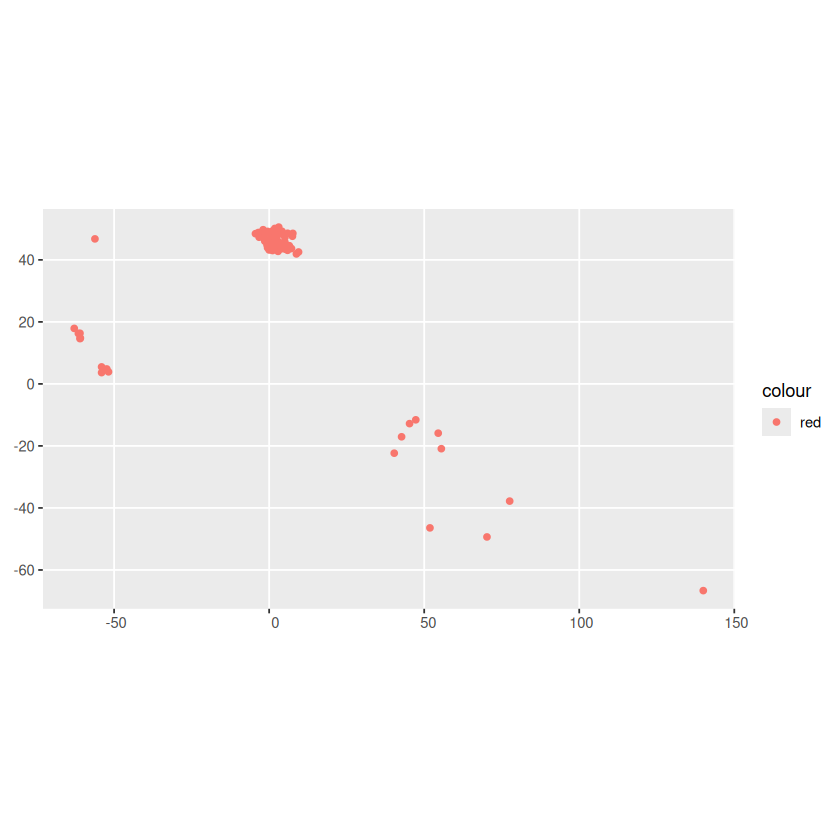

In [5]:

my_sf <- st_as_sf(stations_df, coords = c('Longitude', 'Latitude'))

#Plot without world map:

ggplot(my_sf) + 
  geom_sf(aes(color = 'red'))


[1] "sf"         "data.frame"

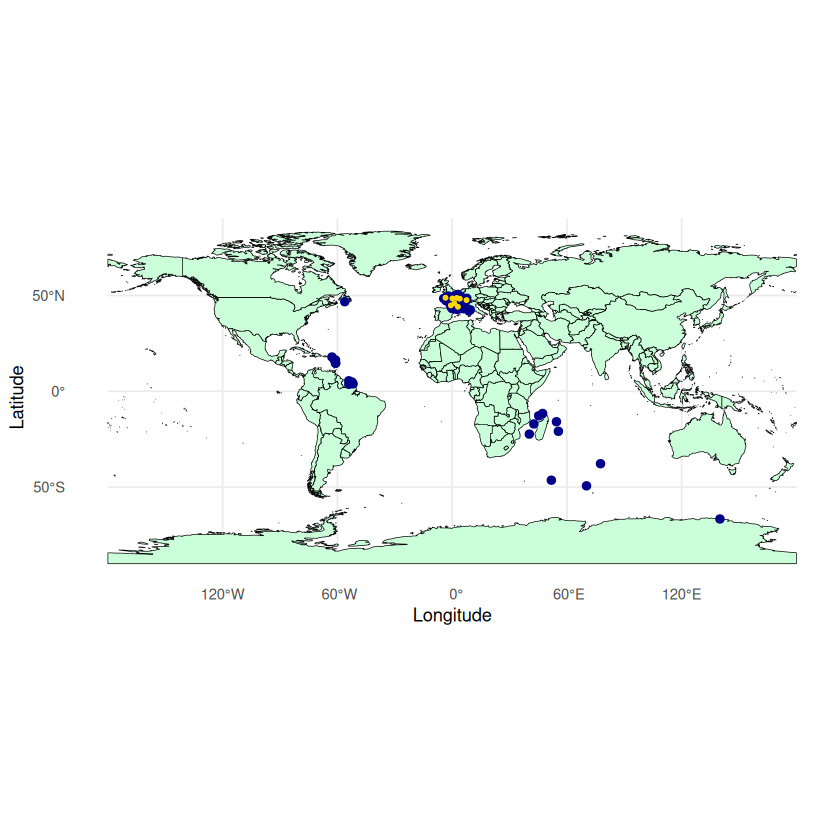

In [6]:

worldmap <- ne_countries(scale = 'medium', type = 'map_units',
                         returnclass = 'sf')
class(worldmap)


ggplot() +
  geom_sf(data = worldmap, color = "black", fill = "#CAFFDA") +
  geom_point(data = stations_df, aes(x = Longitude, y = Latitude), color = "darkblue", size = 2) +
  geom_point(data = stations_df[stations_df$ID.OMM.station %in% stations_in_file, ], 
            aes(x = Longitude, y = Latitude), 
            color = "gold", size = 1) +
  coord_sf() +
  theme_minimal()

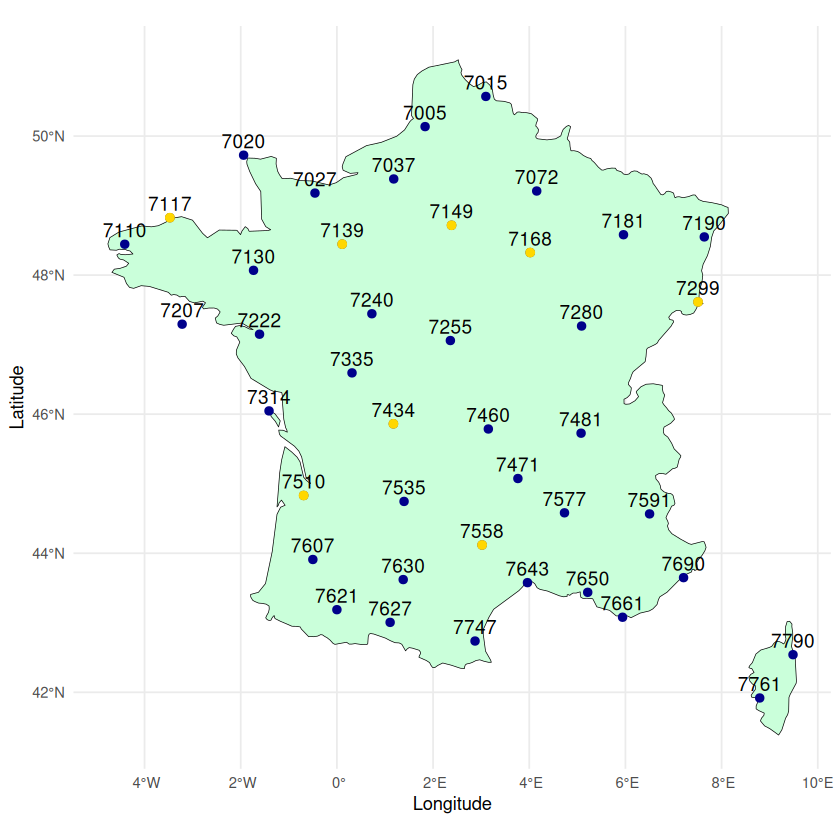

In [21]:
ggplot() +
  geom_sf(data = worldmap[worldmap$name == 'France',], color = "black", fill = "#CAFFDA") +
  geom_point(data = stations_df[stations_df$Longitude > -10 & stations_df$Longitude < 10, ], 
            aes(x = Longitude, y = Latitude), 
            color = "darkblue", size = 2) +
  coord_sf() +
  geom_text(data = stations_df[stations_df$Longitude > -10 & stations_df$Longitude < 10, ],
              aes(x = Longitude, y = Latitude, label = ID.OMM.station),
              size = 4, color = "black", nudge_y = 0.2) + 
  geom_point(data = stations_df[stations_df$Longitude > -10 & stations_df$Longitude < 10 & stations_df$ID.OMM.station %in% stations_in_file, ], 
            aes(x = Longitude, y = Latitude), 
            color = "gold", size = 2.1) +
  theme_minimal()

In [8]:
histogramggplot <- function(xs, title, legx, legy ){
    ggplot(xs, aes(x=legx, y=legy, fill=legx)) +
    geom_boxplot() +
    theme_light() +
    scale_fill_brewer("Set3")
}

histogram <- function(xs, title, legx, legy){
    my_colors <- c("#FFA500", "#008000", "#1E90FF", "#FF1493")
    tryCatch(
        {
        par(bg = 'white')
        boxplot(xs, xlab = legx, ylab = legy, las = 1, col = my_colors)
        grid()
        },
        error=function(e) {
            message('An error occurred (in histogram function)')
            print("with title")
            print(e)
        })
    
}



[1] 7510 7149 7168 7139 7558 7434 7117 7299
[1] "7222" "7621" "7072" "7661"


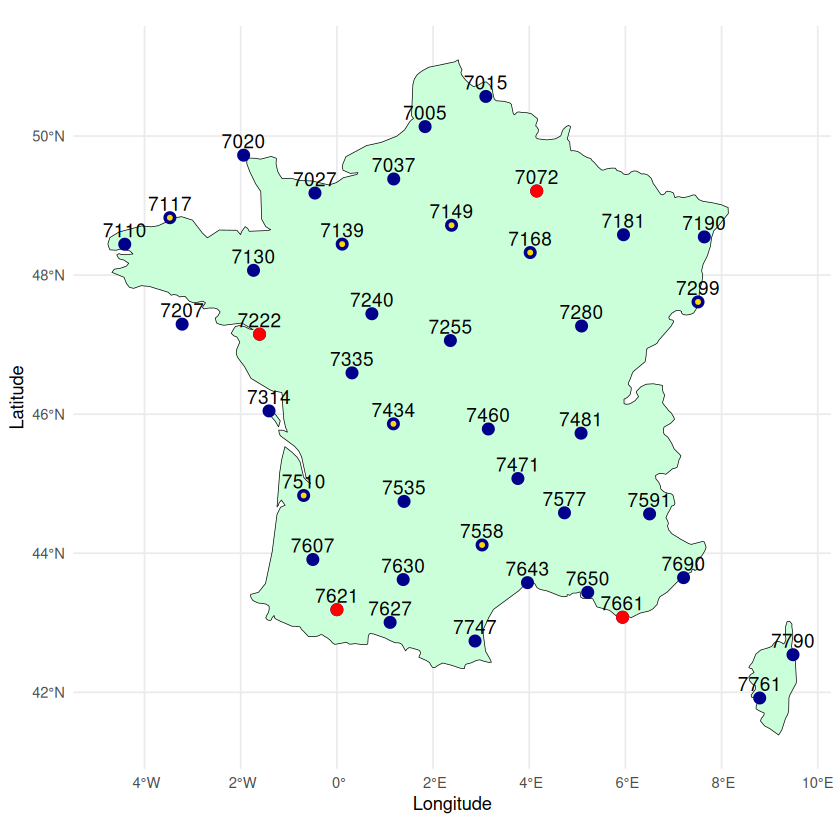

In [9]:

chosen_stations = c("7222", "7621", "7072", "7661")
print(stations_in_file)
print(chosen_stations)

ggplot() +
  geom_sf(data = worldmap[worldmap$name == 'France',], color = "black", fill = "#CAFFDA") +
  geom_point(data = stations_df[stations_df$Longitude > -10 & stations_df$Longitude < 10, ], 
            aes(x = Longitude, y = Latitude), 
            color = "darkblue", size = 3) +
  geom_point(data = stations_df[stations_df$Longitude > -10 & stations_df$Longitude < 10 & stations_df$ID.OMM.station %in% chosen_stations, ], 
            aes(x = Longitude, y = Latitude), 
            color = "red", size = 3) +
  geom_point(data = stations_df[stations_df$Longitude > -10 & stations_df$Longitude < 10 & stations_df$ID.OMM.station %in% stations_in_file, ], 
            aes(x = Longitude, y = Latitude), 
            color = "gold", size = 1) +
  coord_sf() +
  geom_text(data = stations_df[stations_df$Longitude > -10 & stations_df$Longitude < 10, ],
              aes(x = Longitude, y = Latitude, label = ID.OMM.station),
              size = 4, color = "black", nudge_y = 0.2) + 
  theme_minimal()

In [10]:

"
Return columns required, with only the rows related to chosen_stations.
"
ColumnSelector <- function(columns, chosen_stations){
    return( select(full_data %>% filter(ID.OMM.station %in% chosen_stations), all_of(columns)) )
}




[1] "\nReturn columns required, with only the rows related to chosen_stations.\n"

In [11]:
ColumnSplitSelector <- function(column, chosen_stations) {
    selections <- list()
    i = 1
    max_length <- 0

    # First pass: find the maximum length
    for (s in chosen_stations) {
        vec <- full_data %>%
            filter(ID.OMM.station == s) %>%
            pull({{column}})
        selections[[i]] <- vec
        max_length <- max(max_length, length(vec))
        i <- i + 1
    }
    # Second pass: pad each vector with NA to max_length
    for (j in seq_along(selections)) {
        if (length(selections[[j]]) < max_length) {
            selections[[j]] <- c(selections[[j]], rep(NA, max_length - length(selections[[j]])))
        }
    }
    # Combine
    df <- do.call(cbind, selections)
    colnames(df) <- chosen_stations
    colnames(df) <- paste("Station", colnames(df), sep = "_")
    return(as.data.frame(df))
}

# histogramme sur sélection auto
autohistogram <- function(column, chosen_stations){
    titlec = gsub("[[:punct:]]", " ", column)
    df_extract_cs = ColumnSplitSelector(column, chosen_stations)
    #print(df_extract_cs)
    histogram(xs = df_extract_cs, legx = "Selected stations" ,legy = column)
    title(titlec)
}


Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
An error occurred (in histogram function)



[1] "with title"
<simpleError in plot.window(xlim = xlim, ylim = ylim, log = log, yaxs = pars$yaxs): need finite 'ylim' values>


Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
An error occurred (in histogram function)



[1] "with title"
<simpleError in plot.window(xlim = xlim, ylim = ylim, log = log, yaxs = pars$yaxs): need finite 'ylim' values>


Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
An error occurred (in histogram function)



[1] "with title"
<simpleError in plot.window(xlim = xlim, ylim = ylim, log = log, yaxs = pars$yaxs): need finite 'ylim' values>


Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
An error occurred (in histogram function)



[1] "with title"
<simpleError in plot.window(xlim = xlim, ylim = ylim, log = log, yaxs = pars$yaxs): need finite 'ylim' values>


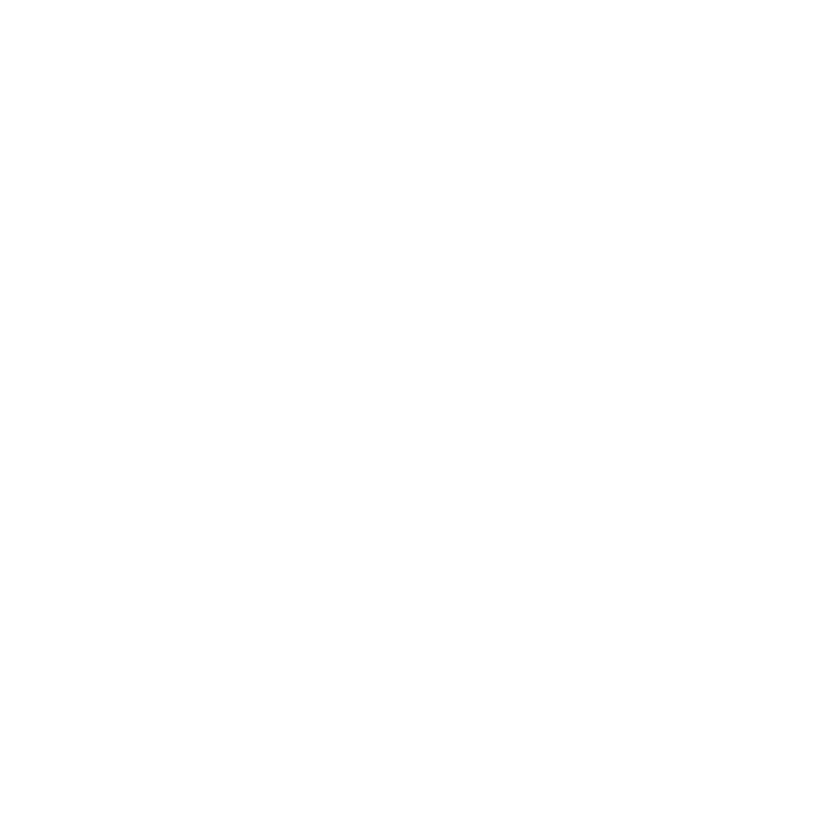

In [12]:
autohistogram("Pression.au.niveau.mer", chosen_stations)
autohistogram("Variation.de.pression.en.3.heures", chosen_stations)
autohistogram("Type.de.tendance.barométrique", chosen_stations)
autohistogram("Vitesse.du.vent.moyen.10.mn", chosen_stations)


Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
An error occurred (in histogram function)



[1] "with title"
<simpleError in plot.window(xlim = xlim, ylim = ylim, log = log, yaxs = pars$yaxs): need finite 'ylim' values>


Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
An error occurred (in histogram function)



[1] "with title"
<simpleError in plot.window(xlim = xlim, ylim = ylim, log = log, yaxs = pars$yaxs): need finite 'ylim' values>


Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
An error occurred (in histogram function)



[1] "with title"
<simpleError in plot.window(xlim = xlim, ylim = ylim, log = log, yaxs = pars$yaxs): need finite 'ylim' values>


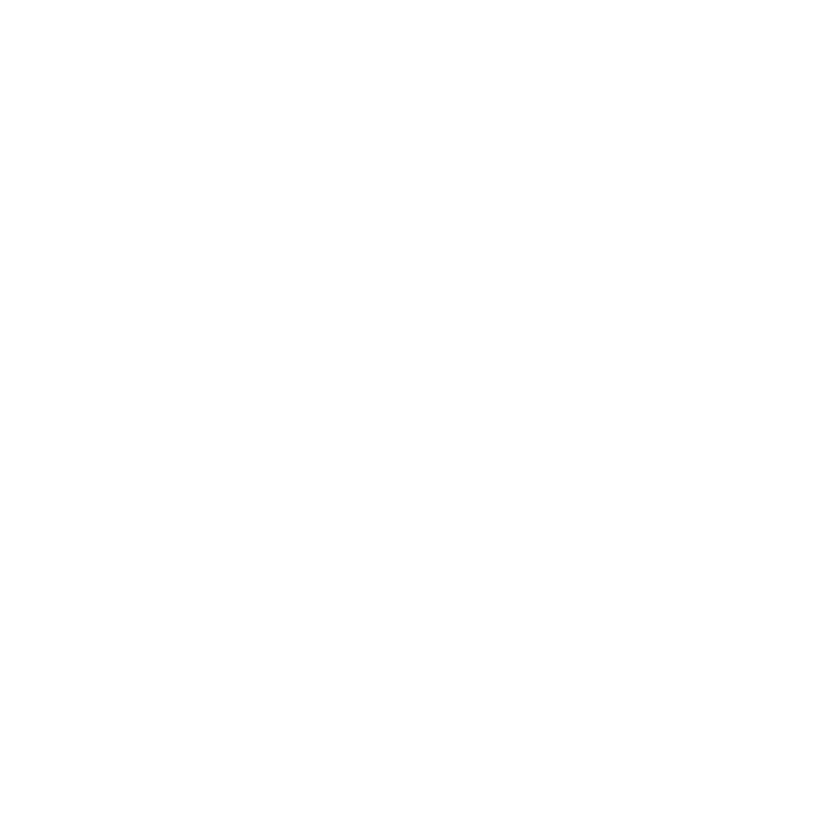

In [13]:

autohistogram("Température", chosen_stations)
autohistogram("Point.de.rosée", chosen_stations)
autohistogram("Humidité", chosen_stations)


Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
An error occurred (in histogram function)



[1] "with title"
<simpleError in plot.window(xlim = xlim, ylim = ylim, log = log, yaxs = pars$yaxs): need finite 'ylim' values>


Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
An error occurred (in histogram function)



[1] "with title"
<simpleError in plot.window(xlim = xlim, ylim = ylim, log = log, yaxs = pars$yaxs): need finite 'ylim' values>


Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
An error occurred (in histogram function)



[1] "with title"
<simpleError in plot.window(xlim = xlim, ylim = ylim, log = log, yaxs = pars$yaxs): need finite 'ylim' values>


Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
An error occurred (in histogram function)



[1] "with title"
<simpleError in plot.window(xlim = xlim, ylim = ylim, log = log, yaxs = pars$yaxs): need finite 'ylim' values>


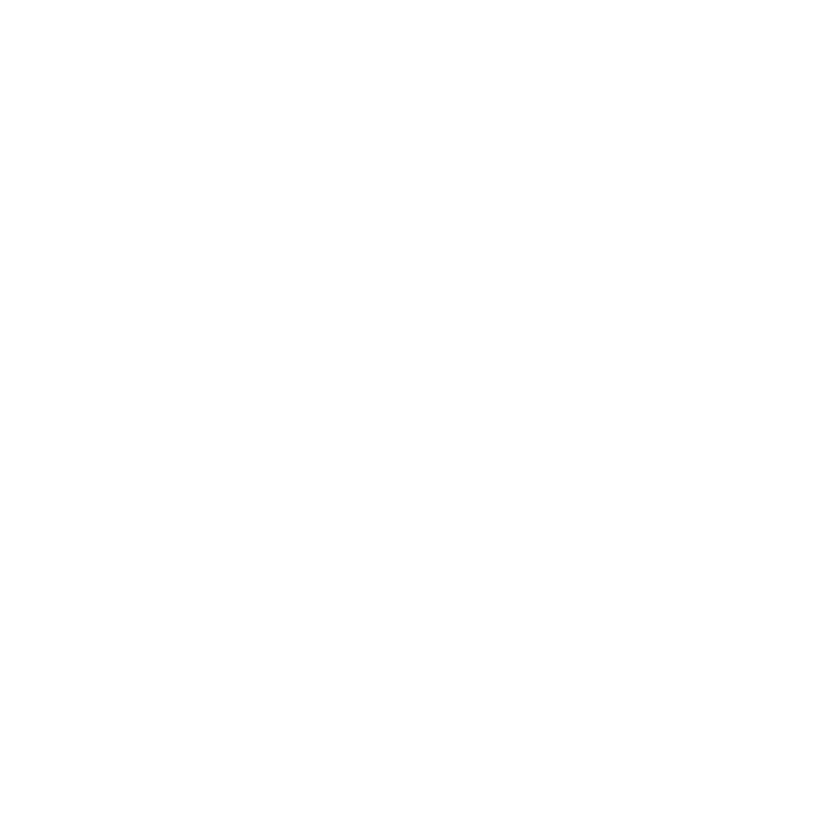

In [14]:

autohistogram("Visibilité.horizontale", chosen_stations)
autohistogram("Nebulosité.totale", chosen_stations)
autohistogram("Hauteur.de.la.base.des.nuages.de.l.étage.inférieur", chosen_stations)
autohistogram("Pression.station", chosen_stations)


Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
An error occurred (in histogram function)



[1] "with title"
<simpleError in plot.window(xlim = xlim, ylim = ylim, log = log, yaxs = pars$yaxs): need finite 'ylim' values>


Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
An error occurred (in histogram function)



[1] "with title"
<simpleError in plot.window(xlim = xlim, ylim = ylim, log = log, yaxs = pars$yaxs): need finite 'ylim' values>


Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
An error occurred (in histogram function)



[1] "with title"
<simpleError in plot.window(xlim = xlim, ylim = ylim, log = log, yaxs = pars$yaxs): need finite 'ylim' values>


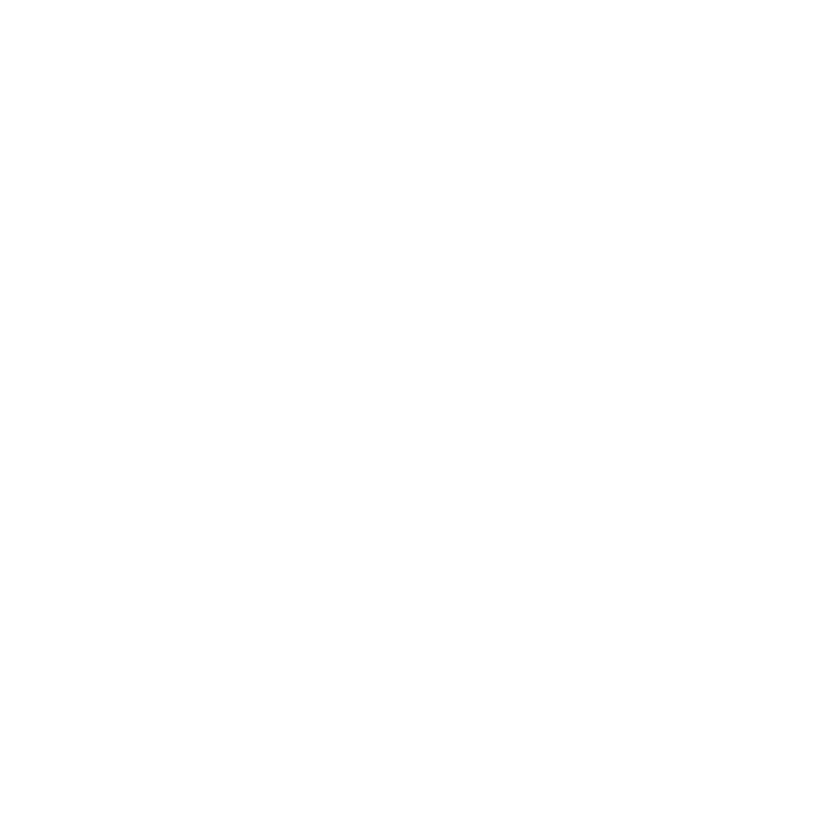

In [15]:

# autohistogram("Géopotentiel", chosen_stations) fonctionne pas
autohistogram("Variation.de.pression.en.24.heures", chosen_stations)
autohistogram("Température.minimale.sur.24.heures", chosen_stations)
autohistogram("Température.maximale.sur.24.heures", chosen_stations)


Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
An error occurred (in histogram function)



[1] "with title"
<simpleError in plot.window(xlim = xlim, ylim = ylim, log = log, yaxs = pars$yaxs): need finite 'ylim' values>


Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
An error occurred (in histogram function)



[1] "with title"
<simpleError in plot.window(xlim = xlim, ylim = ylim, log = log, yaxs = pars$yaxs): need finite 'ylim' values>


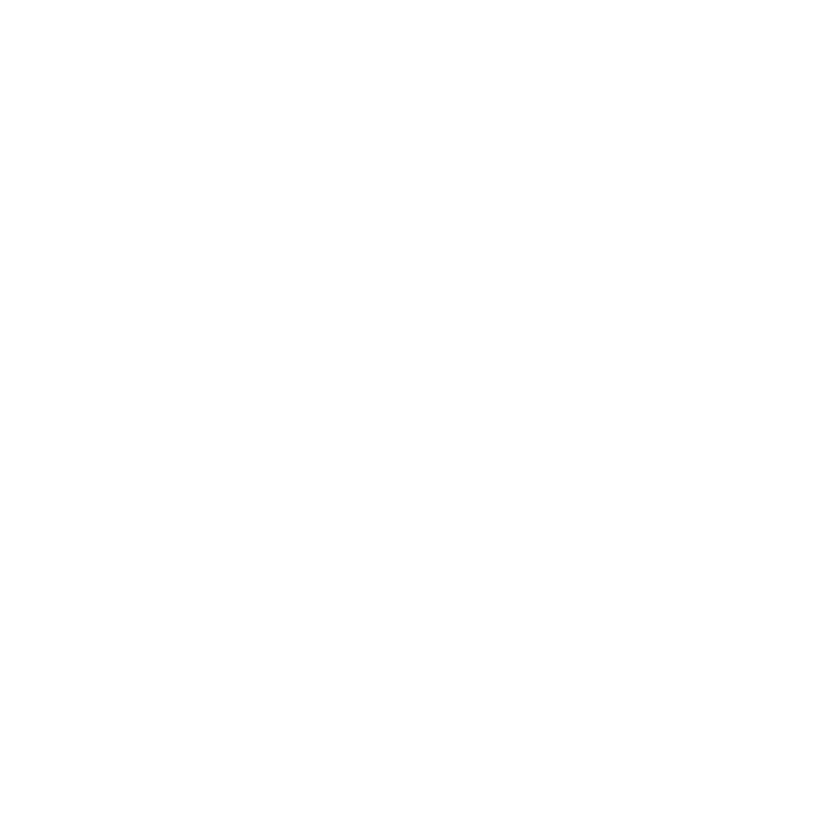

In [16]:
autohistogram("Température.minimale.du.sol.sur.12.heures", chosen_stations)
autohistogram("Rafale.sur.les.10.dernières.minutes", chosen_stations)





In [17]:
list_all_values <- function(data, column){
    all_values = unique(unlist(data[column]))
    colname = gsub("[[:punct:]]", " ", column)
    print(glue("All values found in column  '{colname}' : "))
    for(v in all_values){
        print(v)
    }
}

list_all_values(full_data, "communes..name.")

All values found in column  'communes  name ' : 
[1] "Mérignac"
[1] "Athis-Mons"
[1] "Barberey-Saint-Sulpice"
[1] "Cerisé"
[1] "Millau"
[1] "Limoges"
[1] "Perros-Guirec"
[1] "Blotzheim"


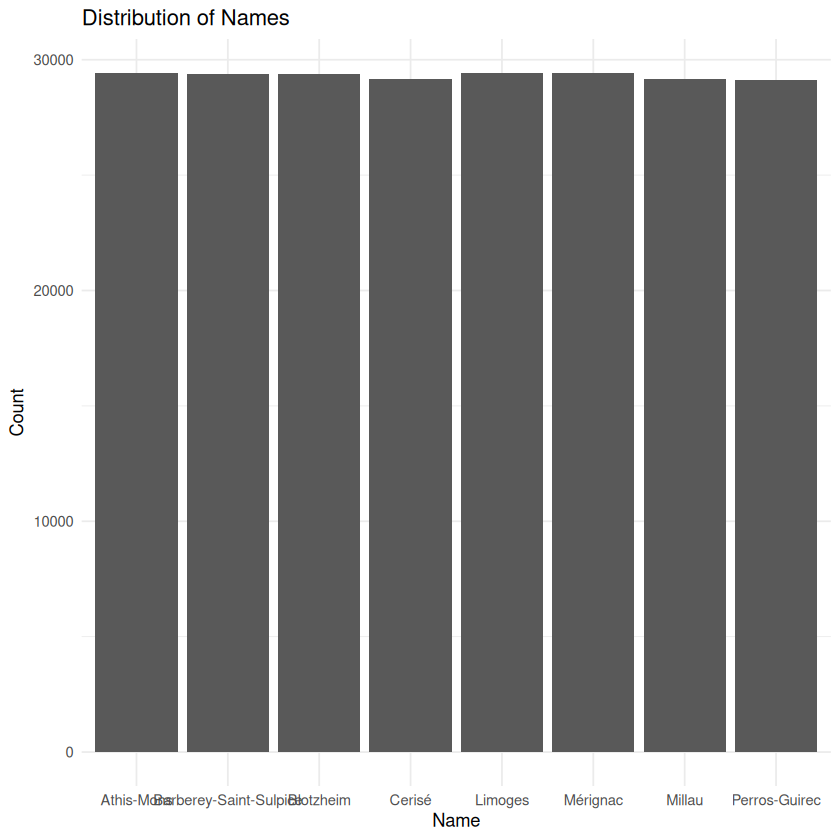

In [18]:
ggplot(full_data, aes(x = communes..name.)) +
  geom_bar() +
  labs(title = "Distribution of Names", x = "Name", y = "Count") +
  theme_minimal()

In [19]:
plot_name_distribution <- function(data, column_name) {
  library(ggplot2)

  ggplot(data, aes(x = .data[[column_name]])) +
    geom_bar() +
    labs(title = paste("Distribution of", column_name),
         x = column_name,
         y = "Count") +
    theme_minimal()
}
